# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# The capomulin treatment of mouse l509 did not have a significant effect in lowering the tumor volume until after day 20, in which it went down in volume until day 35, when it started
# to slowly go up again

# Ramicane and Capomulin have the lowest standard deviations and mean tumor volumes out of the drugs used in the test

# There are 3 total outliers in the boxplot data. 2 past the lower bound of Capomulin and 1 past the lower bound of Ramicane.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].value_counts()

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mice) == False]
clean_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study_df['Mouse ID'].value_counts()

Mouse ID
k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_mean = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_variance = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_std = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_SEM = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_table_df = pd.DataFrame({'Mean Tumor Volume' : drug_mean,
                                 'Median Tumor Volume' : drug_median,
                                 'Tumor Volume Variance' : drug_variance,
                                 'Tumor Volume Std. Dev.' : drug_std,
                                 'Tumor Volume Std. Err.' : drug_SEM})
summary_table_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
single_line_df = clean_mouse_study_df.groupby('Drug Regimen')
single_line_summary = single_line_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
single_line_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

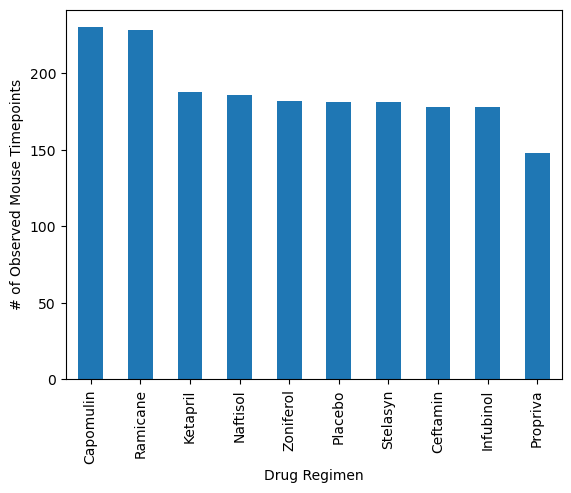

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot_data = clean_mouse_study_df.groupby(['Drug Regimen'])['Mouse ID'].count()
pandas_bar_plot = bar_plot_data.sort_values(ascending = False).plot.bar()

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

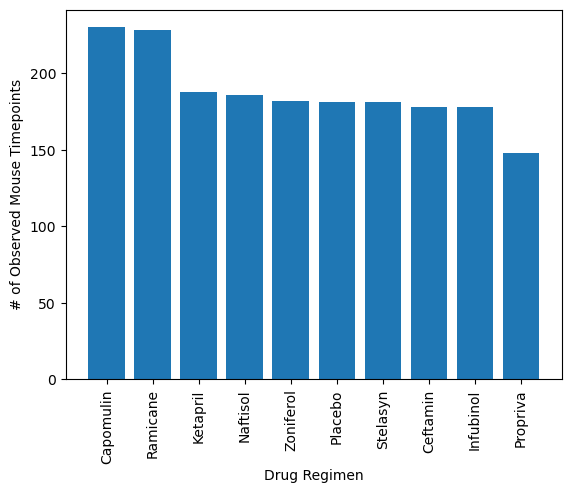

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_plot_pyplot = bar_plot_data.sort_values(ascending=False)
plt.bar(bar_plot_pyplot.index, bar_plot_pyplot.values)
plt.xlabel('Drug Regimen')
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 'vertical')
plt.show()

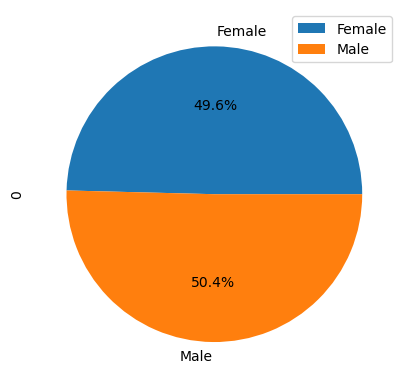

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_pie_chart_data = clean_mouse_study_df.groupby(['Mouse ID', 'Sex'])
gender_pie_chart_data_df = pd.DataFrame(gender_pie_chart_data.size())

mice_gender_pie_chart_data = pd.DataFrame(gender_pie_chart_data_df.groupby(['Sex']).count())
mice_gender_pie_chart_data


# Make the pie chart
gender_pie_chart = mice_gender_pie_chart_data.plot.pie(subplots=True,
                                                       autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x22947662030>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

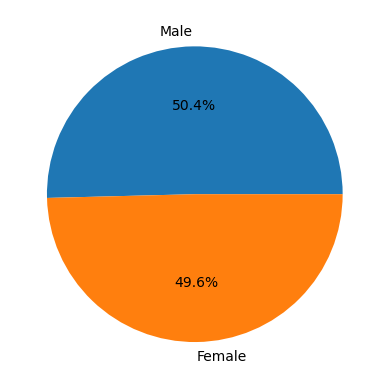

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = ['Male', 'Female']
gender_count = [125, 123]

# Make the pie chart
plt.pie(gender_count, labels=gender, autopct= '%1.1f%%')

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(clean_mouse_study_df.groupby(['Mouse ID'])['Timepoint'].max())
last_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_mouse_study_df, last_timepoint_df, on = 'Mouse ID')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = merged_df['Tumor Volume (mm3)'].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq


    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments_list:

    # add subset
    subset = merged_df[merged_df["Drug Regimen"] == treatment]
    tumor_vol_data.append(subset['Tumor Volume (mm3)'])


    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq - (1.5 * iqr)
    outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]

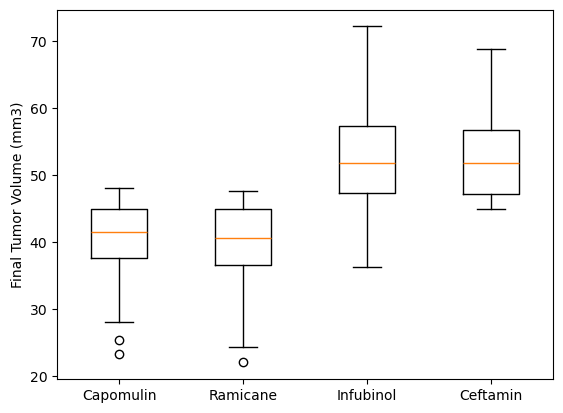

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data)
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

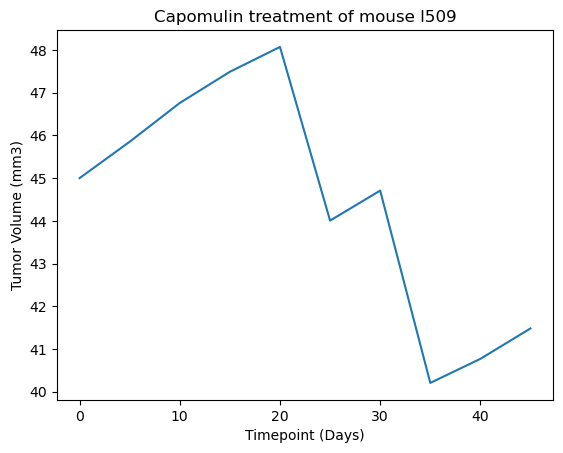

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_mouse = clean_mouse_study_df.loc[clean_mouse_study_df['Drug Regimen'] == 'Capomulin', :]

mouse_id = 'l509'
mouse_df = Capomulin_mouse[Capomulin_mouse['Mouse ID'] == mouse_id]

line_plot = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

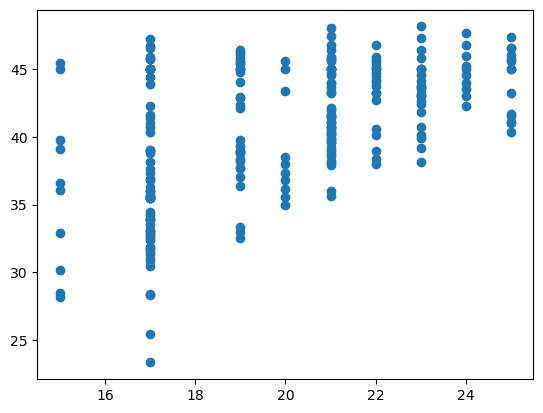

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Capomulin", : ]
plt.scatter(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'])
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

